In [1]:
import numpy as np
import pandas as pd

A = pd.read_csv("./anonymisedData/assessments.csv")
B = pd.read_csv("./anonymisedData/courses.csv")
C = pd.read_csv("./anonymisedData/studentAssessment.csv")
D = pd.read_csv("./anonymisedData/studentInfo.csv")
E = pd.read_csv("./anonymisedData/studentRegistration.csv")
F = pd.read_csv("./anonymisedData/studentVle.csv")
G = pd.read_csv("./anonymisedData/vle.csv")

A.head()


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [2]:
A.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [4]:
A.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64

In [5]:
A.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [6]:
A.loc[A['date'] == '', 'date'] = pd.NA
AB = pd.merge(A, B, on=['code_module', 'code_presentation'], how='left')
AB.loc[(AB['date'].isna()) & (AB['assessment_type'] == 'Exam'), 'date'] = AB['module_presentation_length']
AB.head(10)
A = AB[A.columns]
A.head(10)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,268.0,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


In [7]:
B.nunique()

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64

In [8]:
B.isna().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [9]:
A.head(10)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,268.0,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


In [10]:
A.loc[:, 'date'] = A['date'].astype(float).astype(int)
A.describe()

,id_assessment,date,weight
count,206.000000,206.000000,206.000000
mean,26473.975728,150.966019,20.873786
std,10098.625521,78.161395,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,81.250000,0.000000
50%,25364.500000,159.000000,12.500000
75%,34891.750000,227.000000,24.250000
max,40088.000000,269.000000,100.000000


In [11]:
C.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [12]:
C.nunique()

id_assessment       188
id_student        23369
date_submitted      312
is_banked             2
score               101
dtype: int64

In [13]:
C.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [14]:
C['score'].replace('', 0, inplace=True)
C['score'] = C['score'].fillna(0)
C['score'] = C['score'].astype(float)

In [15]:
C.isna().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [16]:
C.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173912.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.724171
std,8829.784254,5.523952e+05,71.484148,0.104194,18.940093
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [17]:
min_date = C['date_submitted'].min()
row_with_min_date =C[C['date_submitted'] == min_date]
print(row_with_min_date)

       id_assessment  id_student  date_submitted  is_banked  score
28783          15008      559381             -11          0   63.0


In [18]:
print('date_submited = -1: ', ((C.date_submitted == -1) & (C.is_banked == 1)).sum())

date_submited = -1:  1909


In [19]:
print('date submited = ?: ', ((C.date_submitted != -1) & (C.is_banked == 1)).sum())

date submited = ?:  0


In [20]:
print('date submited = ?: ', ((C.date_submitted < -1) & (C.is_banked == 0)).sum())

date submited = ?:  130


In [21]:
average_date_submitted = C[C['date_submitted'] >= 0]['date_submitted'].mean()
average_date_submitted_int = int(round(average_date_submitted))
C.loc[C['date_submitted'] < 0, 'date_submitted'] = average_date_submitted_int
C['date_submitted'] = C['date_submitted'].astype(int)

In [22]:
C.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173912.000000
mean,26553.803556,7.051507e+05,117.431575,0.010977,75.724171
std,8829.784254,5.523952e+05,70.323030,0.104194,18.940093
min,1752.000000,6.516000e+03,0.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,52.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,117.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [23]:
max_dates_dict = pd.Series(A.date.values, index=A.id_assessment).to_dict()

# provjera je li date_submitted unutar oeckivanog raspona
def is_date_within_expected(row):
    max_date = max_dates_dict.get(row['id_assessment'], None)
    if max_date is not None:
        return row['date_submitted'] <= max_date
    return False  
C['is_within_expected_date'] = C.apply(is_date_within_expected, axis=1)

In [24]:
C.head()

,id_assessment,id_student,date_submitted,is_banked,score,is_within_expected_date
0,1752,11391,18,0,78.0,True
1,1752,28400,22,0,70.0,False
2,1752,31604,17,0,72.0,True
3,1752,32885,26,0,69.0,False
4,1752,38053,19,0,79.0,True


In [25]:
D.nunique()

code_module                 7
code_presentation           4
id_student              28785
gender                      2
region                     13
highest_education           5
imd_band                   10
age_band                    3
num_of_prev_attempts        7
studied_credits            61
disability                  2
final_result                4
dtype: int64

In [26]:
D.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [27]:
D['imd_band'].replace('', np.nan, inplace=True)

In [28]:
from sklearn.impute import SimpleImputer
D.replace('nan', np.nan, inplace=True)
imputer = SimpleImputer(strategy='most_frequent')
D['imd_band'] = imputer.fit_transform(D[['imd_band']])[:, 0]

smth = D[D['id_student'] == 53025]
print(smth)

  code_module code_presentation  id_student gender        region  \
9         AAA             2013J       53025      M  North Region   

             highest_education imd_band age_band  num_of_prev_attempts  \
9  Post Graduate Qualification   20-30%     55<=                     0   

   studied_credits disability final_result  
9               60          N         Pass  


In [29]:
D.isna().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

In [30]:
D.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [31]:
E.nunique()

code_module                7
code_presentation          4
id_student             28785
date_registration        332
date_unregistration      416
dtype: int64

In [32]:
E.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [33]:
missing_registration_students = E[E['date_registration'].isna()]['id_student'].unique()

C.drop(C[C['id_student'].isin(missing_registration_students)].index, inplace=True)
D.drop(D[D['id_student'].isin(missing_registration_students)].index, inplace=True)
F.drop(F[F['id_student'].isin(missing_registration_students)].index, inplace=True)
E.drop(E[E['id_student'].isin(missing_registration_students)].index, inplace=True)

In [34]:
E.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration          0
date_unregistration    22509
dtype: int64

In [37]:
E['dropped_out'] = ~E['date_unregistration'].isna()
E.describe()

,id_student,date_registration,date_unregistration
count,3.253300e+04,32533.000000,10024.000000
mean,7.061736e+05,-69.394922,50.313448
std,5.483846e+05,49.255643,82.002264
min,3.733000e+03,-322.000000,-317.000000
25%,5.085170e+05,-100.000000,-1.000000
50%,5.902410e+05,-57.000000,29.000000
75%,6.443840e+05,-29.000000,109.000000
max,2.698591e+06,167.000000,444.000000


In [38]:
E.head(10)

,code_module,code_presentation,id_student,date_registration,date_unregistration,dropped_out
0,AAA,2013J,11391,-159.0,NaN,False
1,AAA,2013J,28400,-53.0,NaN,False
2,AAA,2013J,30268,-92.0,12.0,True
3,AAA,2013J,31604,-52.0,NaN,False
4,AAA,2013J,32885,-176.0,NaN,False
5,AAA,2013J,38053,-110.0,NaN,False
6,AAA,2013J,45462,-67.0,NaN,False
7,AAA,2013J,45642,-29.0,NaN,False
8,AAA,2013J,52130,-33.0,NaN,False
9,AAA,2013J,53025,-179.0,NaN,False


In [39]:
F.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [40]:
pd.set_option('display.float_format', '{:.2f}'.format)
F.describe()

,id_student,id_site,date,sum_click
count,10652127.00,10652127.00,10652127.00,10652127.00
mean,733355.03,738341.47,95.18,3.72
std,582704.93,131214.12,76.07,8.85
min,6516.00,526721.00,-25.00,1.00
25%,507743.00,673519.00,25.00,1.00
50%,588240.00,730069.00,86.00,2.00
75%,646489.00,877030.00,156.00,3.00
max,2698588.00,1049562.00,269.00,6977.00


In [41]:
row = F[F['sum_click'] > 3000]
print(row)

        code_module code_presentation  id_student  id_site  date  sum_click
3907683         DDD             2013J      204505   673519    43       6977
4482533         DDD             2014B      620337   773028    35       3958
5072596         DDD             2014J      592214   814061   121       4953
5469679         EEE             2013J      601224   551135    87       4523
6331815         FFF             2013B      497180   526721     1       4098
6931847         FFF             2013B      543643   526853   140       3725


In [42]:
F.drop(F[F['sum_click'] > 1000].index, inplace=True)

In [43]:
F.describe()

,id_student,id_site,date,sum_click
count,10652104.00,10652104.00,10652104.00,10652104.00
mean,733355.13,738341.42,95.18,3.71
std,582705.06,131214.10,76.07,7.77
min,6516.00,526721.00,-25.00,1.00
25%,507743.00,673519.00,25.00,1.00
50%,588240.00,730069.00,86.00,2.00
75%,646489.00,877030.00,156.00,3.00
max,2698588.00,1049562.00,269.00,998.00


In [44]:
G.nunique()

id_site              6364
code_module             7
code_presentation       4
activity_type          20
week_from              30
week_to                30
dtype: int64

In [45]:
G.isna().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [46]:
G.drop('week_from', axis=1, inplace=True)
G.drop('week_to', axis=1, inplace=True)

In [47]:
A.to_csv('assessments_clean.csv', index=False)
B.to_csv('courses_clean.csv', index=False)
C.to_csv('studentAssessment_clean.csv', index=False)
D.to_csv('studentInfo_clean.csv', index=False)
E.to_csv('studentRegistration_clean.csv', index=False)
F.to_csv('studentVle_clean.csv', index=False)
G.to_csv('vle_clean.csv', index=False)

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

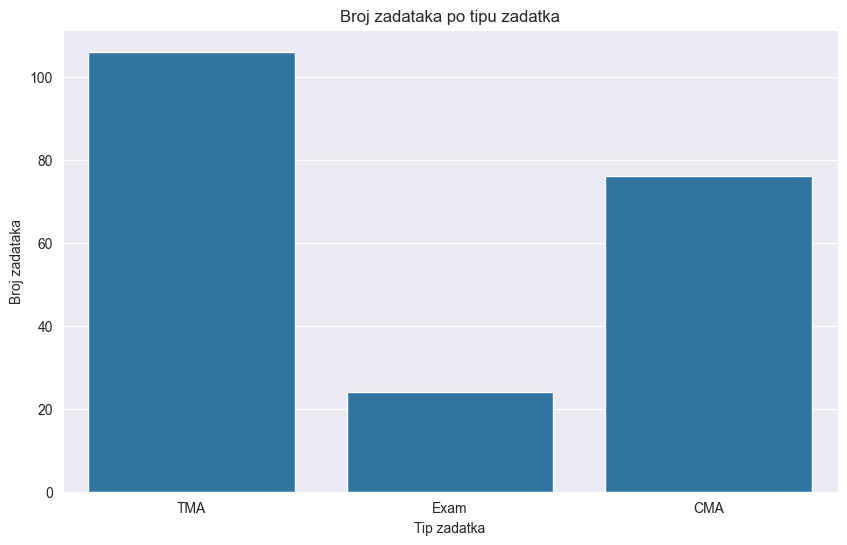

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(data=A, x='assessment_type')
plt.title('Broj zadataka po tipu zadatka')
plt.xlabel('Tip zadatka')
plt.ylabel('Broj zadataka')
plt.show()

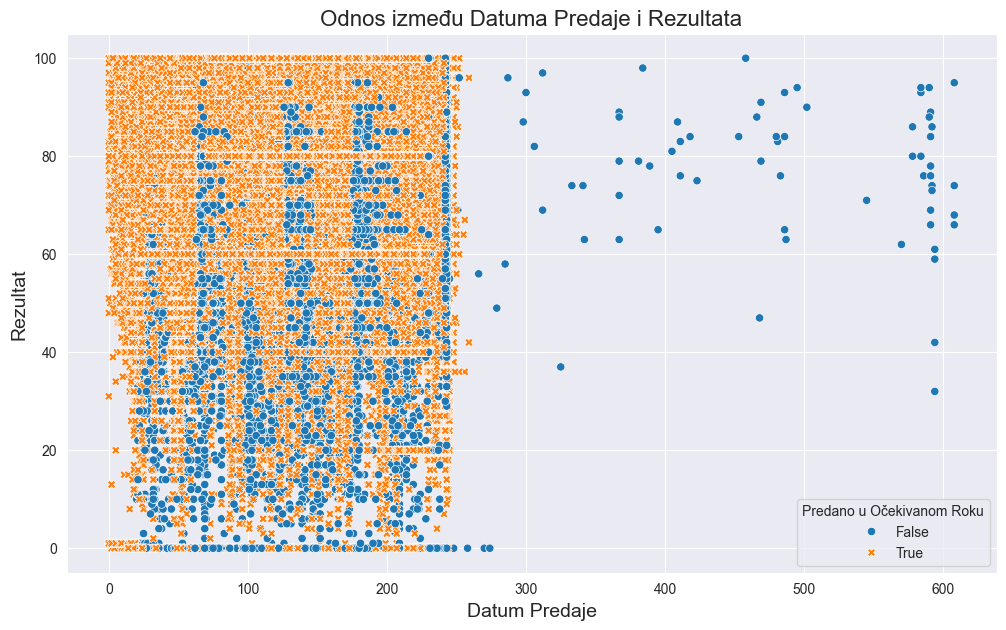

In [50]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='date_submitted', y='score', hue='is_within_expected_date', style='is_within_expected_date', data=C)
plt.title('Odnos između Datuma Predaje i Rezultata', fontsize=16)
plt.xlabel('Datum Predaje', fontsize=14)
plt.ylabel('Rezultat', fontsize=14)
plt.legend(title='Predano u Očekivanom Roku')
plt.grid(True)

plt.show()

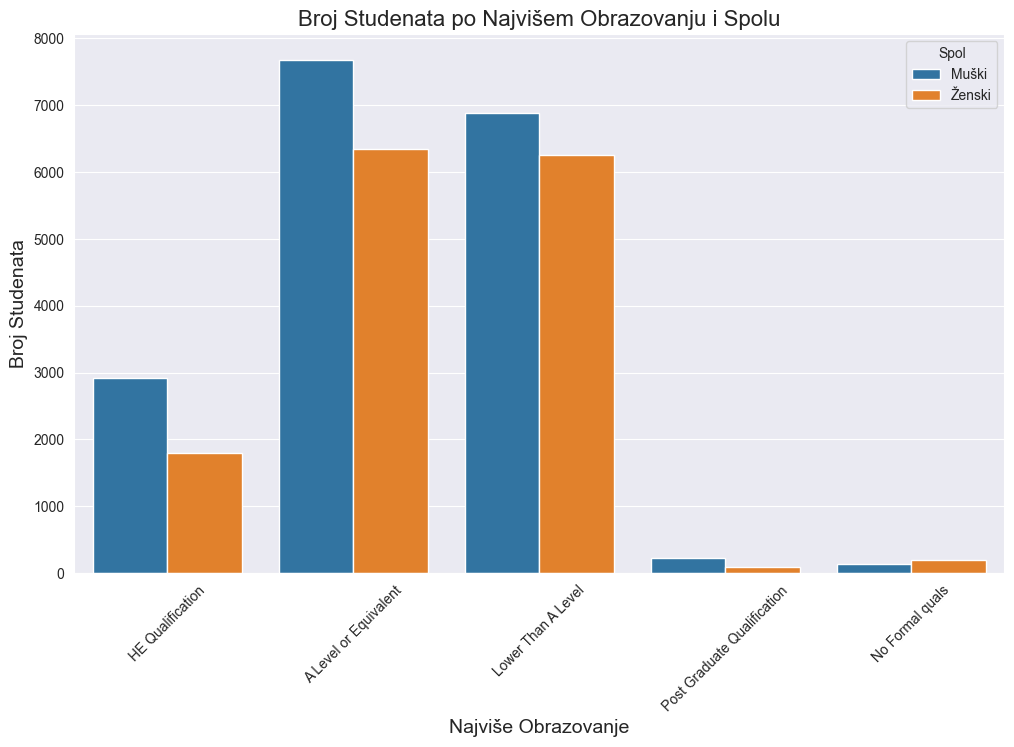

In [51]:
plt.figure(figsize=(12, 7))
sns.countplot(x='highest_education', hue='gender', data=D)
plt.title('Broj Studenata po Najvišem Obrazovanju i Spolu', fontsize=16)
plt.xlabel('Najviše Obrazovanje', fontsize=14)
plt.ylabel('Broj Studenata', fontsize=14)
plt.xticks(rotation=45) 
plt.legend(title='Spol', labels=['Muški', 'Ženski']) 

# Show the plot
plt.show()

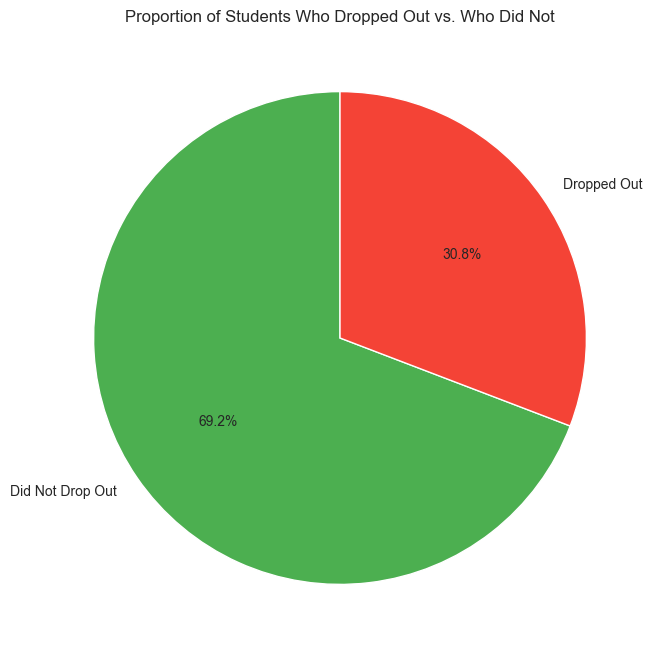

In [52]:
dropout_summary = E['dropped_out'].value_counts().rename(index={True: 'Dropped Out', False: 'Did Not Drop Out'})

plt.figure(figsize=(8, 8))
dropout_summary.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
plt.title('Proportion of Students Who Dropped Out vs. Who Did Not')
plt.ylabel('') 
plt.show()

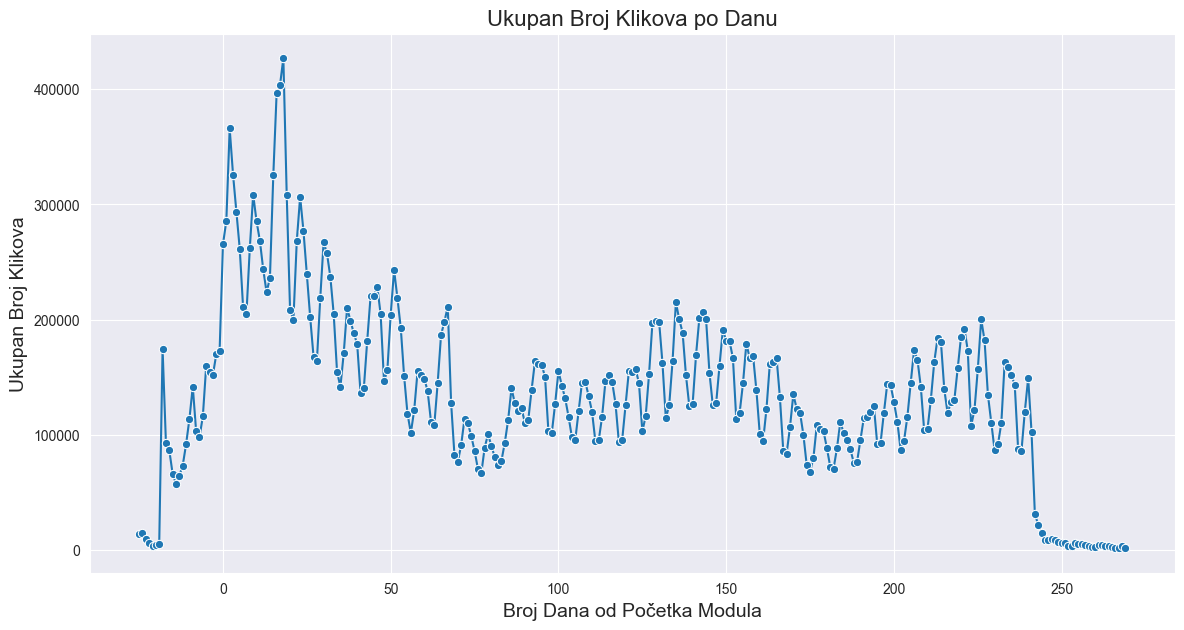

In [54]:
date_clicks = F.groupby('date')['sum_click'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='sum_click', data=date_clicks, marker='o')
plt.title('Ukupan Broj Klikova po Danu', fontsize=16)
plt.xlabel('Broj Dana od Početka Modula', fontsize=14)
plt.ylabel('Ukupan Broj Klikova', fontsize=14)
plt.grid(True)

plt.show()

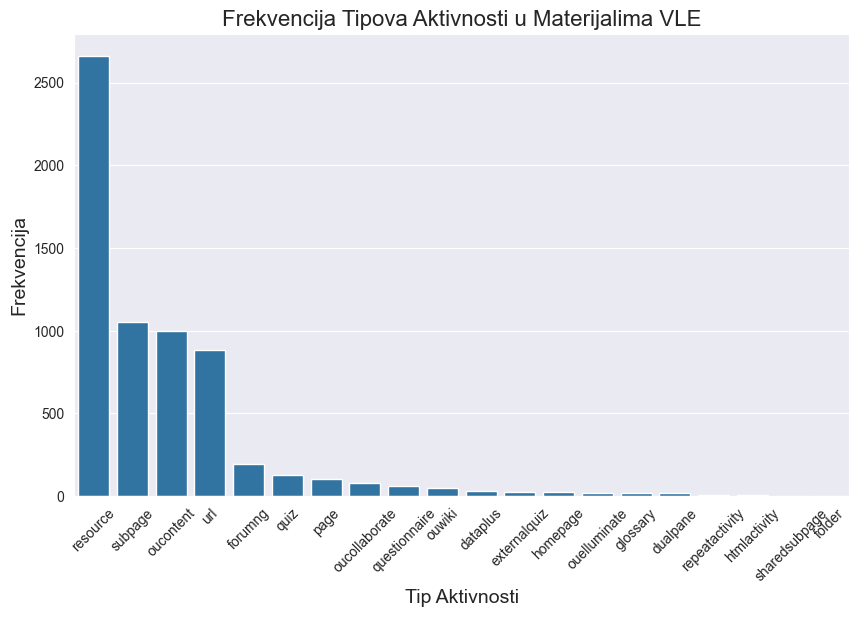

In [57]:
activity_counts = G['activity_type'].value_counts().reset_index()
activity_counts.columns = ['activity_type', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='activity_type', y='count', data=activity_counts)
plt.title('Frekvencija Tipova Aktivnosti u Materijalima VLE', fontsize=16)
plt.xlabel('Tip Aktivnosti', fontsize=14)
plt.ylabel('Frekvencija', fontsize=14)
plt.xticks(rotation=45)

plt.show()